Practice Project 1

# Salary Project

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Dataset
df_sal=pd.read_csv("Salaries.csv")
df_sal

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


In [3]:
df_sal.head(5)

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


In [4]:
df_sal.tail(5)

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329
396,AsstProf,A,8,4,Male,81035


In [5]:
df_sal.shape

(397, 6)

In [6]:
df_sal.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

In [7]:
df_sal.describe()

,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438
std,12.887003,13.006024,30289.038695
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,16.000000,107300.000000
75%,32.000000,27.000000,134185.000000
max,56.000000,60.000000,231545.000000


<AxesSubplot:>

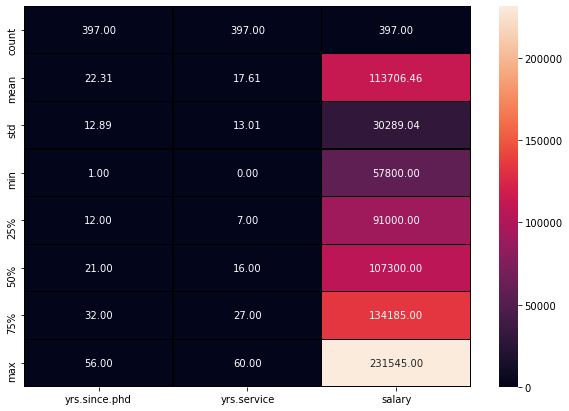

In [8]:
# Visualizing df_sal.describe() using heatmap
plt.figure(figsize=(10,7))
sns.heatmap(df_sal.describe(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")

In [9]:
df_sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rank           397 non-null    object
 1   discipline     397 non-null    object
 2   yrs.since.phd  397 non-null    int64 
 3   yrs.service    397 non-null    int64 
 4   sex            397 non-null    object
 5   salary         397 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 18.7+ KB


In [10]:
df_sal.dtypes

rank             object
discipline       object
yrs.since.phd     int64
yrs.service       int64
sex              object
salary            int64
dtype: object

In [11]:
df_sal.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

There are no null values present in the dataset.

In [12]:
df_sal.corr()

,yrs.since.phd,yrs.service,salary
yrs.since.phd,1.000000,0.909649,0.419231
yrs.service,0.909649,1.000000,0.334745
salary,0.419231,0.334745,1.000000


<AxesSubplot:>

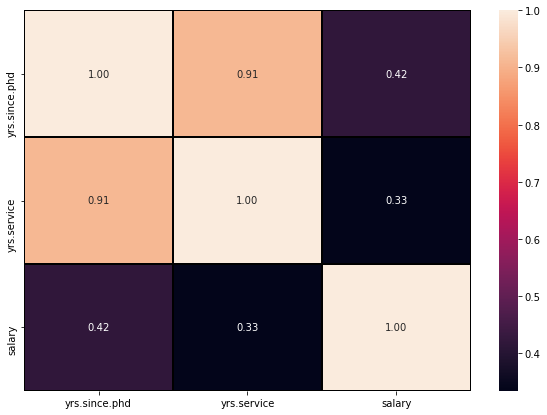

In [13]:
# Visualizing df_sal.corr() using heatmap
plt.figure(figsize=(10,7))
sns.heatmap(df_sal.corr(),annot=True,linewidths=0.5,linecolor='black',fmt='.2f')

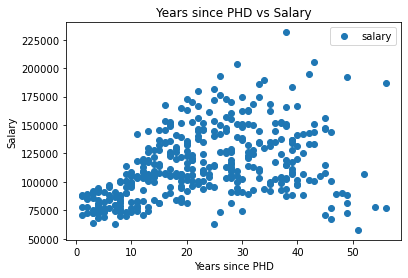

In [14]:
df_sal.plot(x='yrs.since.phd', y='salary',style='o')
plt.title('Years since PHD vs Salary')
plt.xlabel('Years since PHD')
plt.ylabel('Salary')
plt.show()

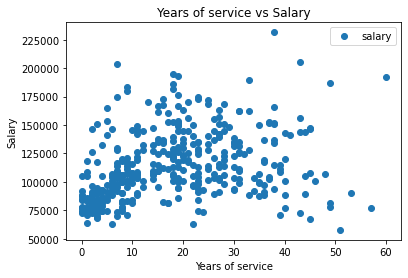

In [15]:
df_sal.plot(x='yrs.service', y='salary',style='o')
plt.title('Years of service vs Salary')
plt.xlabel('Years of service')
plt.ylabel('Salary')
plt.show()

<AxesSubplot:xlabel='yrs.since.phd', ylabel='salary'>

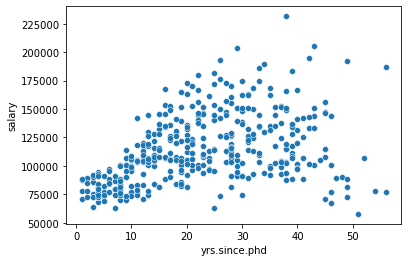

In [16]:
sns.scatterplot(x='yrs.since.phd',y='salary',data=df_sal)

<AxesSubplot:xlabel='yrs.service', ylabel='salary'>

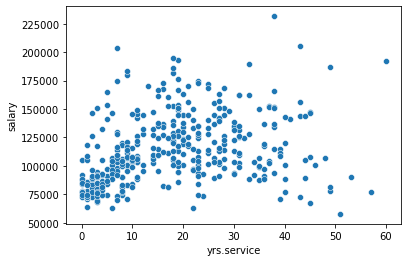

In [17]:
sns.scatterplot(x='yrs.service',y='salary',data=df_sal)

The above graphs show the relation between 'yrs.service' & 'salary'. And the relationship between the values of 'yrs.since.phd' & 'salary'

# Outliers

<AxesSubplot:xlabel='salary'>

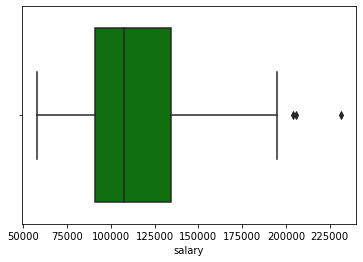

In [18]:
sns.boxplot(df_sal['salary'],color='green',orient='v')

<AxesSubplot:xlabel='yrs.service'>

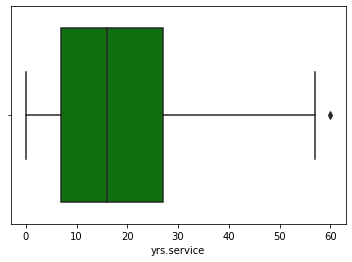

In [19]:
sns.boxplot(df_sal['yrs.service'],color='green',orient='v')

<AxesSubplot:xlabel='yrs.since.phd'>

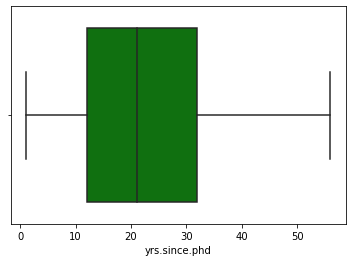

In [20]:
sns.boxplot(df_sal['yrs.since.phd'],color='green',orient='v')

Outliers are present in the columns ='yrs.service' & 'salary'

<AxesSubplot:xlabel='yrs.service', ylabel='salary'>

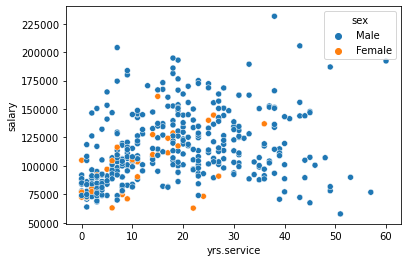

In [21]:
sns.scatterplot(x='yrs.service',y='salary',data=df_sal,estimator=np.std,hue='sex')

In the above scatterplot, the number of male values is huge compared to the female values in terms of columns 'yrs.service' & 'salary'

# Encoding

In [22]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()

In [23]:
for i in df_sal.columns:
    if df_sal[i].dtypes=="object":
        df_sal[i]=oe.fit_transform(df_sal[i].values.reshape(-1,1))

In [24]:
df_sal

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2.0,1.0,19,18,1.0,139750
1,2.0,1.0,20,16,1.0,173200
2,1.0,1.0,4,3,1.0,79750
3,2.0,1.0,45,39,1.0,115000
4,2.0,1.0,40,41,1.0,141500
...,...,...,...,...,...,...
392,2.0,0.0,33,30,1.0,103106
393,2.0,0.0,31,19,1.0,150564
394,2.0,0.0,42,25,1.0,101738
395,2.0,0.0,25,15,1.0,95329


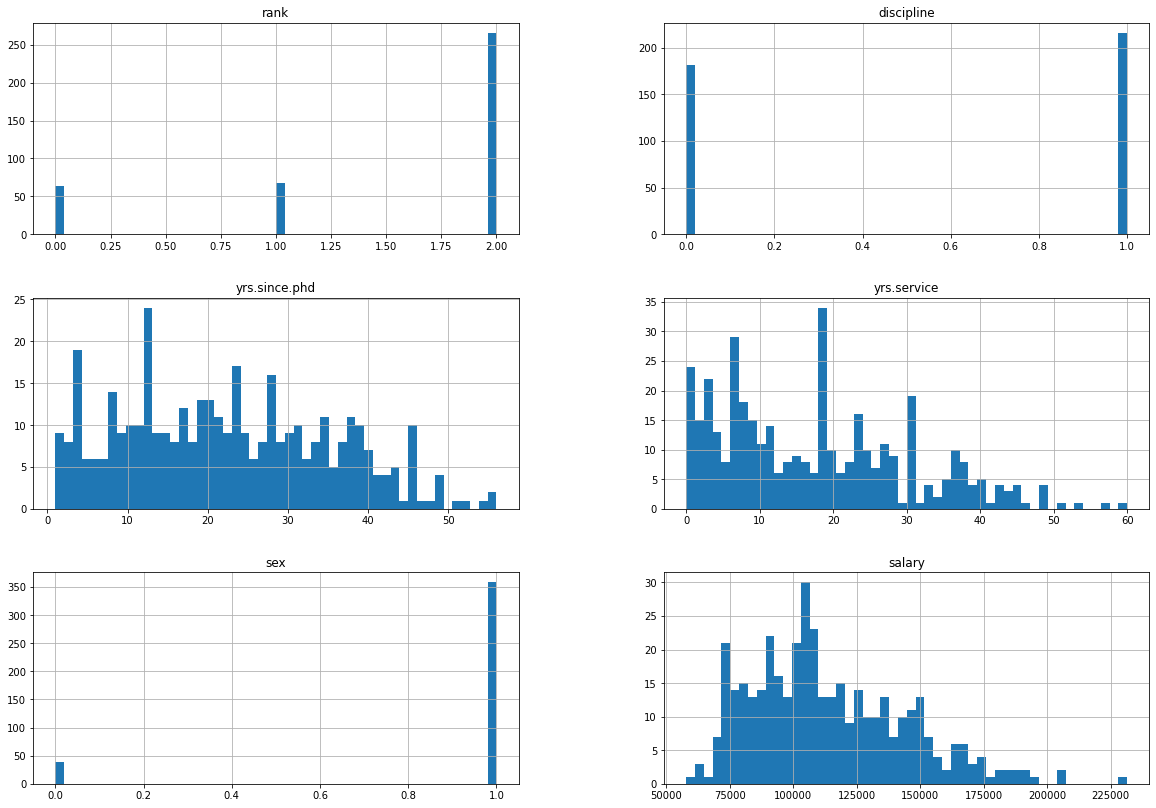

In [25]:
df_sal.hist(bins = 50, figsize = (20,14))
plt.show() 

In the above graphical representation, 'rank' column has the highest number of values as 'AssocProf', 'sex' column has the highest number of values as 'male','discipline' column has the highest number of values as 'B'

There are varied values in the 'yrs.since.phd', 'yrs.service', and 'salary' columns

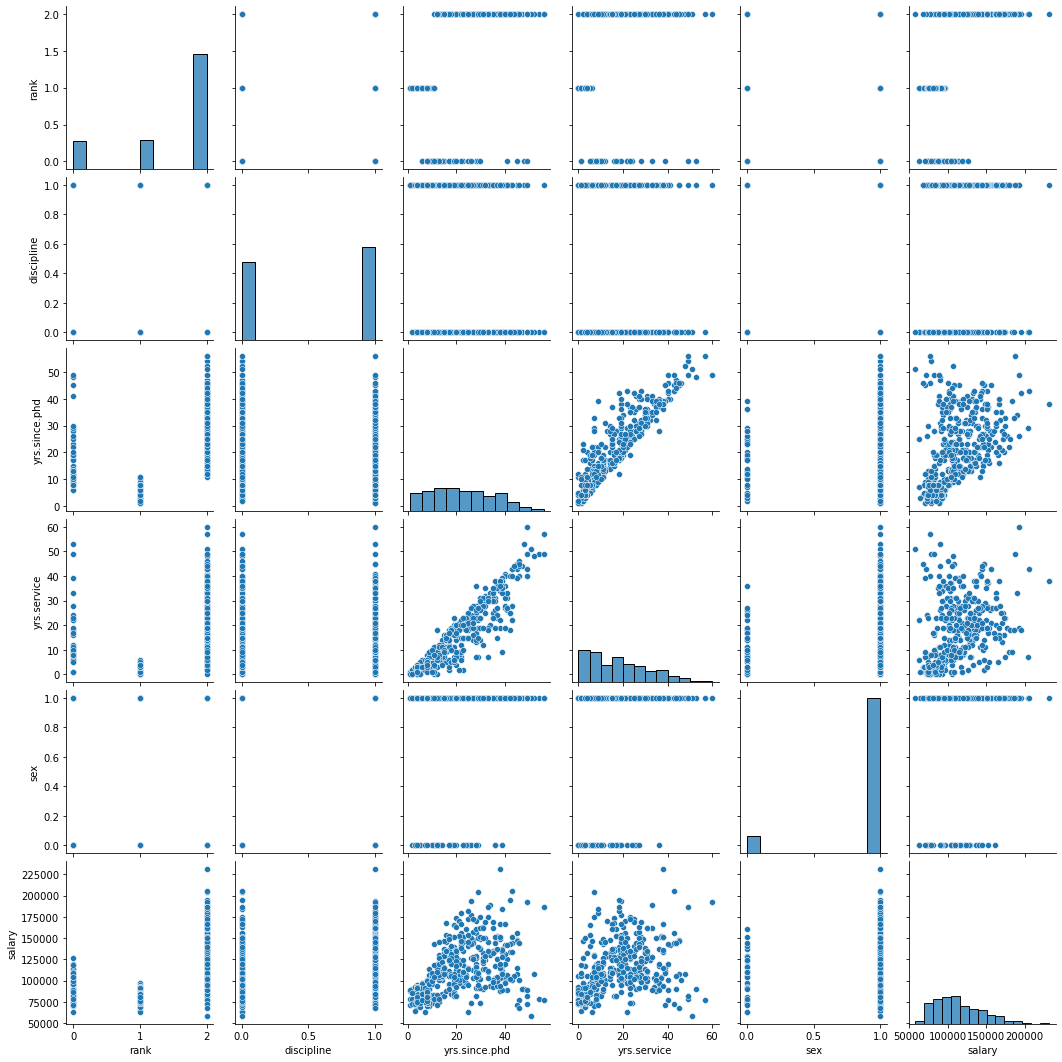

In [26]:
sns.pairplot(df_sal)

# Removing Outliers

Using Z-SCORE to remove outliers from the dataset

In [27]:
from scipy.stats import zscore

z=np.abs(zscore(df_sal))
threshold=3
np.where(z>3)

(array([  9,  19,  24,  34,  35,  43,  47,  48,  52,  63,  68,  84,  90,
        103, 114, 119, 123, 127, 131, 132, 133, 148, 153, 179, 186, 218,
        230, 231, 233, 237, 245, 253, 254, 274, 316, 323, 330, 332, 334,
        341, 358, 361, 364], dtype=int64),
 array([4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 5],
       dtype=int64))

In [28]:
df_sal.describe()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,1.508816,0.544081,22.314861,17.614610,0.901763,113706.458438
std,0.757486,0.498682,12.887003,13.006024,0.298010,30289.038695
min,0.000000,0.000000,1.000000,0.000000,0.000000,57800.000000
25%,1.000000,0.000000,12.000000,7.000000,1.000000,91000.000000
50%,2.000000,1.000000,21.000000,16.000000,1.000000,107300.000000
75%,2.000000,1.000000,32.000000,27.000000,1.000000,134185.000000
max,2.000000,1.000000,56.000000,60.000000,1.000000,231545.000000


In [29]:
# New data frame
df_new_sal=df_sal[(z<3).all(axis=1)]
df_new_sal

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2.0,1.0,19,18,1.0,139750
1,2.0,1.0,20,16,1.0,173200
2,1.0,1.0,4,3,1.0,79750
3,2.0,1.0,45,39,1.0,115000
4,2.0,1.0,40,41,1.0,141500
...,...,...,...,...,...,...
392,2.0,0.0,33,30,1.0,103106
393,2.0,0.0,31,19,1.0,150564
394,2.0,0.0,42,25,1.0,101738
395,2.0,0.0,25,15,1.0,95329


# Data Loss

In [30]:
df_sal.shape

(397, 6)

In [31]:
df_new_sal.shape

(354, 6)

In [32]:
Data_loss=((397-354)/397)*100
Data_loss

10.831234256926953

Data Loss percentage is 10.83 %

We will put all the columns data ( except Salary) in the variable X. And  column Salary which is the target column in the variable Y.

In [33]:
# Data Processing
X=df_new_sal.iloc[: , : -1].values
Y=df_new_sal.iloc[: , -1].values

The Dataset is divided into 2 parts 'X' contains all the columns (except salary) and 'Y' is the salary column which is the target column

In [34]:
X.shape

(354, 5)

In [35]:
Y.shape

(354,)

# Linear Regression

In [36]:
from sklearn.linear_model import LinearRegression
lr_sal=LinearRegression()

In [37]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=40)

In [38]:
lr_sal.fit(X_train,Y_train)

LinearRegression()

In [39]:
X_train.shape

(247, 5)

In [40]:
X_test.shape

(107, 5)

In [41]:
Y_train.shape

(247,)

In [42]:
Y_test.shape

(107,)

In [43]:
lr_sal.coef_

array([16791.8669427 , 14356.68912648,  1211.47960029,  -675.36548584,
           0.        ])

In [44]:
lr_sal.intercept_

66181.69166619121

In [45]:
lr_sal.score(X_train,Y_train)

0.383849091489495

In [46]:
# Predicting the value
pred_lr=lr_sal.predict(X_test)
print("Predicted value: ",pred_lr)
print("Actual value: ",Y_test)

Predicted value:  [123772.16873829 126452.73931058 130344.82144668 132691.17142554
 119128.20778522  99753.20693596  89673.21210949 100010.81830766
 141805.1113713  122163.85835845 120813.12738678 142299.44274363
 124767.85167254 124844.42893073 121669.52698612 122365.78384302
 119761.79052893 126195.12793888  87144.11152423 121488.49287261
 121488.46090909 100150.06967904  89963.93346789  86714.13879445
 133839.97691265  99474.7041932  125380.51108166  82919.55725113
 122818.33247322 123256.9459949  129175.09262498 122699.97247291
 134160.26239753 126452.73931058 123632.94933044  86038.77330861
 116663.46584251 116663.46584251 102463.37359825 126633.80538761
  88216.33975314 120694.76738646 115451.98624221 121230.84953739
  89030.95661036 132670.28005448 121766.96365185  83755.06547941
 124983.64833859 125380.51108166 112931.55841237 134494.45102742
 129216.90733063 113049.91841269 133561.47416989  99474.7041932
 135650.24474058 134933.09651262 130087.21007498 134494.45102742
  75316.

In [47]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

print('Error:')

print('Mean absolute error: ',mean_absolute_error(Y_test,pred_lr))
print('Mean squared error: ',mean_squared_error(Y_test,pred_lr))

print('Root Mean squared error: ',np.sqrt(mean_squared_error(Y_test,pred_lr)))

Error:
Mean absolute error:  19314.112637352544
Mean squared error:  539298606.4272826
Root Mean squared error:  23222.803586718004


In [48]:
from sklearn.metrics import r2_score
lr_score = r2_score(Y_test,pred_lr)
print('R2 Score:', lr_score*100)

R2 Score: 23.035423338899953


In [49]:
from sklearn.model_selection import cross_val_score
lr_cvs = cross_val_score(lr_sal,X,Y,cv=5)
lr_cvs = lr_cvs.mean()
print('Cross Val Score:', lr_cvs*100)

Cross Val Score: 26.71985753918663


# Lasso Regression

In [50]:
from sklearn.linear_model import Lasso
parameters = {'alpha':[.0001, .001, .01, .1, 1, 10],'random_state':list(range(0,10))}
ls_sal= Lasso()

In [51]:
ls_sal.fit(X_train,Y_train)

Lasso()

In [52]:
ls_sal.score(X_train,Y_train)

0.3838490842814859

In [53]:
ls_sal.coef_

array([16789.52930372, 14352.52004118,  1211.45577406,  -675.30124359,
           0.        ])

In [54]:
pred_ls=ls_sal.predict(X_test)
print("Predicted value: ",pred_ls)
print("Actual value: ",Y_test)

Predicted value:  [123769.3078158  126450.08046818 130347.24678513 132687.37069555
 119128.8662891   99751.90851166  89674.52699986 100009.76961591
 141801.99771363 122165.78211489 120815.17962772 142297.28760016
 124768.70502008 124846.55476727 121670.49222836 122366.22579392
 119763.30288874 126192.21936393  87146.99877502 121490.48087131
 121485.54298079 100148.91632902  89966.91814051  86715.46092126
 133837.52950369  99473.61508543 125377.77140723  82921.51456399
 122820.65103651 123253.5856073  129171.7177645  122701.93664537
 134156.68757386 126450.08046818 123635.09899321  86040.15967768
 116665.09009703 116665.09009703 102464.38598408 126635.02971575
  88219.30783597 120696.46523658 115453.63432297 121227.68187654
  89033.75579267 132666.93837358 121763.83640701  83756.39484266
 124980.76358987 125377.77140723 112932.44070568 134492.39842531
 129217.52029896 113051.15509681 133559.23607747  99473.61508543
 135646.43677415 134930.27088662 130089.38568088 134492.39842531
  75322

In [55]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

print('Error:')

print('Mean absolute error: ',mean_absolute_error(Y_test,pred_ls))
print('Mean squared error: ',mean_squared_error(Y_test,pred_ls))

print('Root Mean squared error: ',np.sqrt(mean_squared_error(Y_test,pred_ls)))

Error:
Mean absolute error:  19313.74655180577
Mean squared error:  539288735.4078685
Root Mean squared error:  23222.59105715528


In [56]:
ls_score = r2_score(Y_test,pred_ls)
print('R2 Score:', ls_score*100)

R2 Score: 23.036832055372358


In [57]:
from sklearn.model_selection import cross_val_score
ls_cvs = cross_val_score(ls_sal,X,Y,cv=5)
ls_cvs = ls_cvs.mean()
print('Cross Val Score:', ls_cvs*100)

Cross Val Score: 26.720464535797788


# Ridge Regression

In [58]:
from sklearn.linear_model import Ridge
parameters = {'alpha':[.0001, .001, .01, .1, 1, 10],'random_state':list(range(0,10))}
rd_sal= Ridge()

In [59]:
rd_sal = Ridge(alpha=0.0001,random_state=0)
rd_sal.fit(X_train,Y_train)

Ridge(alpha=0.0001, random_state=0)

In [60]:
rd_sal.score(X_train,Y_train)

0.3838490914892191

In [61]:
pred_rd=rd_sal.predict(X_test)
print("Predicted value: ",pred_rd)
print("Actual value: ",Y_test)

Predicted value:  [123772.14849737 126452.72074593 130344.83644685 132691.15146476
 119128.21274414  99753.19833812  89673.22387136 100010.81062767
 141805.09710985 122163.8686211  120813.13756152 142299.43181834
 124767.85940142 124844.44086966 121669.53391262 122365.78931303
 119761.79853271 126195.10845638  87144.12730746 121488.50309131
 121488.43961845 100150.06170775  89963.9506361   86714.14946264
 133839.96183242  99474.69617796 125380.49184651  82919.56857343
 122818.34428028 123256.92391828 129175.07273571 122699.98307081
 134160.24373381 126452.72074593 123632.96089015  86038.78393285
 116663.47304391 116663.47304391 102463.38919619 126633.8150401
  88216.35620688 120694.77635205 115451.9930644  121230.8273289
  89030.97281675 132670.26159415 121766.94177861  83755.07505392
 124983.62847688 125380.49184651 112931.56176654 134494.4374916
 129216.91594981 113049.92297601 133561.45967226  99474.69617796
 135650.22587348 134933.08060246 130087.2241573  134494.4374916
  75316.558

In [62]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

print('Error:')

print('Mean absolute error: ',mean_absolute_error(Y_test,pred_rd))
print('Mean squared error: ',mean_squared_error(Y_test,pred_rd))

print('Root Mean squared error: ',np.sqrt(mean_squared_error(Y_test,pred_rd)))

Error:
Mean absolute error:  19314.110260432146
Mean squared error:  539298539.294021
Root Mean squared error:  23222.802141301145


In [63]:
rd_score = r2_score(Y_test,pred_rd)
print('R2 Score:', rd_score*100)

R2 Score: 23.035432919646126


In [64]:
from sklearn.model_selection import cross_val_score
rd_cvs = cross_val_score(rd_sal,X,Y,cv=5)
rd_cvs = rd_cvs.mean()
print('Cross Val Score:', rd_cvs*100)

Cross Val Score: 26.719863320391806


# Decision Tree Regressor

In [65]:
from sklearn.tree import DecisionTreeRegressor
dtr_sal = DecisionTreeRegressor(random_state = 0) 

In [66]:
dtr_sal = DecisionTreeRegressor(random_state=0)
dtr_sal.fit(X_train,Y_train)

DecisionTreeRegressor(random_state=0)

In [67]:
dtr_sal.score(X_train,Y_train)

0.9645361691058759

In [68]:
pred_dtr=dtr_sal.predict(X_test)
print("Predicted value: ",pred_dtr)
print("Actual value: ",Y_test)

Predicted value:  [130664.   155750.    78162.   153303.   106294.    88397.5  100944.
  92350.   145098.   103450.   104279.   119700.   204000.    77202.
  81700.    92050.   121200.   173200.    73000.   104279.   132825.
  83558.25  81035.   113600.   162150.    92350.   121466.5  103760.
 155865.   117150.   106639.    88600.   111168.   155750.    77202.
  95368.5  163200.   163200.   105000.   168635.    69200.   103106.
 163200.   112865.5   85000.   124714.   112865.5   97000.   122100.
 121466.5   88175.   166024.   204000.   101100.   162200.    92350.
 173200.   120165.5   88709.   166024.    93110.    93110.   110515.
  81035.   162150.    98193.    92350.   110515.   133217.    96614.
  73000.   144640.    88709.    98290.    92050.   172505.   173200.
  91300.   133900.    91300.   103760.   106300.   124714.    82100.
  70768.    81800.   100131.    77000.   174500.    96614.   145028.
  81800.   134800.   153750.    74155.   151292.    93418.   104350.
  73877.   15575

In [69]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

print('Error:')

print('Mean absolute error: ',mean_absolute_error(Y_test,pred_dtr))
print('Mean squared error: ',mean_squared_error(Y_test,pred_dtr))

print('Root Mean squared error: ',np.sqrt(mean_squared_error(Y_test,pred_dtr)))

Error:
Mean absolute error:  21796.21261682243
Mean squared error:  966321895.0589954
Root Mean squared error:  31085.718506397683


In [70]:
dtr_score = r2_score(Y_test,pred_dtr)
print('R2 Score:', dtr_score*100)

R2 Score: -37.906077792907645


In [71]:
from sklearn.model_selection import cross_val_score
dtr_cvs = cross_val_score(dtr_sal,X,Y,cv=5)
dtr_cvs = dtr_cvs.mean()
print('Cross Val Score:', dtr_cvs*100)

Cross Val Score: -15.924662317865002


# KNeighbors Regressor

In [72]:
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

knn_sal = neighbors.KNeighborsRegressor()

model_sal = GridSearchCV(knn_sal, params, cv=5)
model_sal.fit(X_train,Y_train)
model_sal.best_params_

{'n_neighbors': 9}

In [73]:
knn_sal= neighbors.KNeighborsRegressor(n_neighbors=7)
knn_sal.fit(X_train, Y_train)
knn_sal.score(X_train, Y_train)
pred_knn = knn_sal.predict(X_test)

In [74]:
knn_score = r2_score(Y_test,pred_knn)
print('R2 Score:', knn_score*100)

R2 Score: 35.88563966427418


In [75]:
knn_cvs = cross_val_score(knn_sal,X,Y,cv=5)
knn_cvs = knn_cvs.mean()
print('Cross Val Score:', knn_cvs*100)

Cross Val Score: 23.619373692797392


In [76]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

print('Error:')

print('Mean absolute error: ',mean_absolute_error(Y_test,pred_knn))
print('Mean squared error: ',mean_squared_error(Y_test,pred_knn))

print('Root Mean squared error: ',np.sqrt(mean_squared_error(Y_test,pred_knn)))

Error:
Mean absolute error:  16961.895861148198
Mean squared error:  449255835.3602899
Root Mean squared error:  21195.656049301466


From the above models, KNeighbors Regression shows the highesr R2 Score among the others. Lasso Regression has the highest Cross Validation Score.

Next, Ridge Regression & Linear Regression are almost identical and there is a slight difference from Lasso Regression in Cross Validation Score. 

Decision Tree Regressor has negative values in both Cross Validation as well as R2 Score.

# Saving Model

Since KNeighbors Regressor shows the Highest R2 Score we will save that model.

In [77]:
import pickle
filename='salary.pkl'
pickle.dump(knn_sal,open(filename,'wb'))